# Exercise 6: Markov Chain Monte Carlo Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import chisquare, chi2

%matplotlib inline

Use the Metropolis-Hastings algorithm to simulate values from truncated Poisson distribution:
$$ P(i) = \frac{ \frac{A^i}{i!} }{ \sum_{j=0}^n \frac{A^j}{j!} } $$
We need a proposal distribution, which is easy to sample from and preferably symmetric. We choose a uniform distribution on the integers $0,\dotsc,n$. I.e.
$$ h(i,j) = \frac {1} {n+1} $$
The probability of accepting a candidate is consequently $\min\{1, g(y)/g(x)\}$.

To test the algorithm, we create 10000 samples with parameters $n=10$ and $A=4$.

In [2]:
# Sample parameters
n = 10
A = 4
x = 1

# PMFs
g = lambda x: A**x/factorial(x)
K = sum(g(i) for i in range(n+1))
P = g(np.arange(n+1)) / K

N = 30000
xs = np.zeros((N,1))

# y is 50/50 x +- 1
for i in range(N):
    if np.random.random() < 0.5:
        y = (x-1) % 11
    else:
        y = (x+1) % 11
    p = min(1, g(y)/g(x))
    if np.random.random() <= p:
        x = y
    xs[i] = x

We plot the histogram of the sampled values along with the PMF of the target distribution to perform a visual test and we perform a $\chi^2$-test for similarity.

Chi^2 similiarity test, p-value: 0.760313


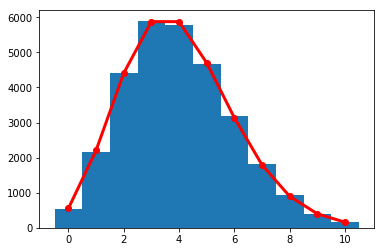

In [3]:
bins, _, _ = plt.hist(xs, np.arange(n+2)-0.5)
plt.plot(np.arange(n+1), P*N, 'o-r', lw=3)
chisqr = sum( (bins-P*N)**2 / (P*N) )
print("Chi^2 similiarity test, p-value: %g" % chi2.sf(chisqr, n) ) 

The histogram of the 30000 simulated values quite neatly follows the PMF of the truncated Poisson distribution. In this case we get 76% chance of observing a more extreme value of the $\chi^2$ statistic. We are 

In [4]:
# Sample parameters
n = 10
A1 = 4
A2 = 4
x = np.array([1,1])

# PMFs
g = lambda x, y: A1**x/factorial(x) * A2**y/factorial(y) if x+y <= n else 0
N = 60000
burnin = 10000
xs = np.zeros((N+burnin,2))

# Sample direction from uniform distribution and accept with prob. g(y)/g(x).
for i in range(N+burnin):
    dx = int(np.random.random()*4)
    if dx % 2 == 0:
        y = ( x + np.array([dx-1, 0]) ) % np.array([n-x[1]+1, n+1])
    else:
        y = ( x + np.array([0, dx-2]) ) % np.array([n+1, n-x[0]+1])
    p = min(1, g(*y)/g(*x))
    if np.random.random() <= p:
        x = y
    xs[i] = x

Chi^2 similiarity test, test-statistic: 211.276, p-value: 2.27943e-17


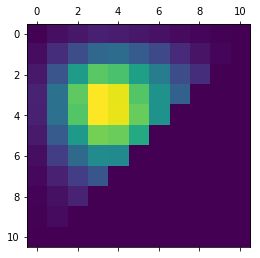

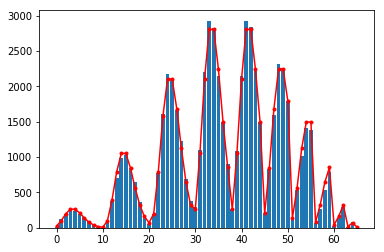

In [5]:
H, _, _ = np.histogram2d(xs[(burnin+1):,0], xs[(burnin+1):,1], np.arange(12)-0.5)
plt.matshow(H)

f_obs = np.array([H[i,j] for i in range(n+1) for j in range(n-i+1)])
f_exp = np.array([g(i,j) for i in range(n+1) for j in range(n-i+1)])
f_exp *= N/np.sum(f_exp)

plt.figure()
plt.bar(np.arange((n+1)*(n+2)/2), f_obs)
plt.plot(np.arange((n+1)*(n+2)/2), f_exp, '.-r')

chisqr = sum( (f_obs-f_exp)**2 / (f_exp) )

print("Chi^2 similiarity test, test-statistic: %g, p-value: %g" % (chisqr, chi2.sf(chisqr, (n+1)*(n+2)/2-1 )) ) 

In [6]:
x = np.ones(2)
xs = np.zeros((N+burnin,2))

for i in range(N+burnin):
    dx = int(np.random.random()*2)
    y = ( x + np.array([ 2*dx-1, 0 ]) ) % np.array([n-x[1]+1, n+1])
    p = min(1, g(*y)/g(*x))
    if np.random.random() <= p:
        x = y
    dx = int(np.random.random()*2)
    y = ( x + np.array([ 0, 2*dx-1 ]) ) % np.array([n+1, n-x[0]+1])
    p = min(1, g(*y)/g(*x))
    if np.random.random() <= p:
        x = y
    xs[i] = x

Chi^2 similiarity test, test-statistic: 64.5867, p-value: 0.491137


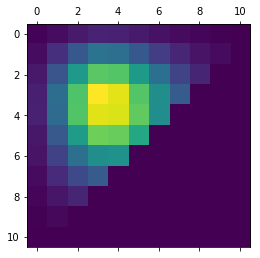

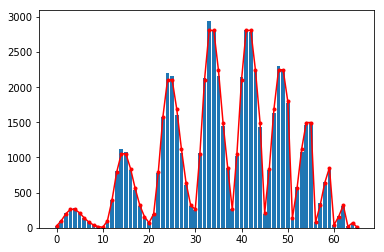

In [7]:
H, _, _ = np.histogram2d(xs[(burnin+1):,0], xs[(burnin+1):,1], np.arange(12)-0.5)
plt.matshow(H)

f_obs = np.array([H[i,j] for i in range(n+1) for j in range(n-i+1)])
f_exp = np.array([g(i,j) for i in range(n+1) for j in range(n-i+1)])
f_exp *= N/np.sum(f_exp)

plt.figure()
plt.bar(np.arange((n+1)*(n+2)/2), f_obs)
plt.plot(np.arange((n+1)*(n+2)/2), f_exp, '.-r')

chisqr = sum( (f_obs-f_exp)**2 / (f_exp) )

print("Chi^2 similiarity test, test-statistic: %g, p-value: %g" % (chisqr, chi2.sf(chisqr, (n+1)*(n+2)/2-1 )) ) 

In [8]:
x = np.ones(2)
xs = np.zeros((N,2))

g1 = lambda x: A1**x/factorial(x)
P1 = g1(np.arange(n+1))
P1 /= np.sum(P1)
P1 = np.cumsum(P1)

g2 = lambda x: A2**x/factorial(x)
P2 = g2(np.arange(n+1))
P2 /= np.sum(P2)
P2 = np.cumsum(P2)
for i in range(N):
    P1 = g1(np.arange(n-x[1]+1))
    P1 /= np.sum(P1)
    P1 = np.cumsum(P1)
    u = np.random.random()
    x[0] = min(np.argwhere(u <= P1))
    
    P2 = g2(np.arange(n-x[0]+1))
    P2 /= np.sum(P2)
    P2 = np.cumsum(P2)
    u = np.random.random()
    x[1] = min(np.argwhere(u <= P2))
    xs[i] = x

Chi^2 similiarity test, test-statistic: 42.4009, p-value: 0.986563


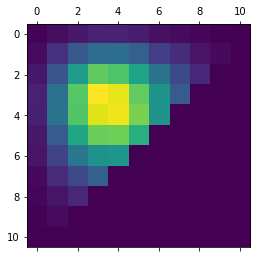

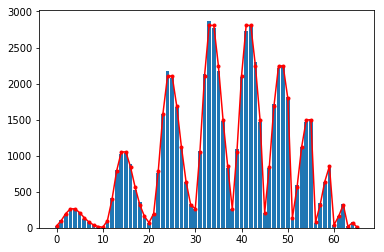

In [9]:
H, _, _ = np.histogram2d(xs[:,0], xs[:,1], np.arange(12)-0.5)
plt.matshow(H)

f_obs = np.array([H[i,j] for i in range(n+1) for j in range(n-i+1)])
f_exp = np.array([g(i,j) for i in range(n+1) for j in range(n-i+1)])
f_exp *= N/np.sum(f_exp)

plt.figure()
plt.bar(np.arange((n+1)*(n+2)/2), f_obs)
plt.plot(np.arange((n+1)*(n+2)/2), f_exp, '.-r')

chisqr = sum( (f_obs-f_exp)**2 / (f_exp) )

print("Chi^2 similiarity test, test-statistic: %g, p-value: %g" % (chisqr, chi2.sf(chisqr, (n+1)*(n+2)/2-1 )) ) 